<a href="https://colab.research.google.com/github/Kmjng/Voice_Recognition_Deep_Learning/blob/main/umap_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa umap-learn matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from umap import UMAP
from google.colab import files
#from google.colab import drive
#drive.mount('/content/drive')



In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#file_upload = '/content/drive/My Drive/Audio/Popular-The-Weeknd_-Madonna_-Playboi-Carti.wav'
#file_upload

In [ ]:
original = r'/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/현종/music dataset/Jungkook Standing Next To You Lyrics.wav'
generate = r'/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/현종/music dataset/Standing Next to You - AI theWeeknd.wav'

original

'/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/현종/music dataset/Jungkook Standing Next To You Lyrics.wav'

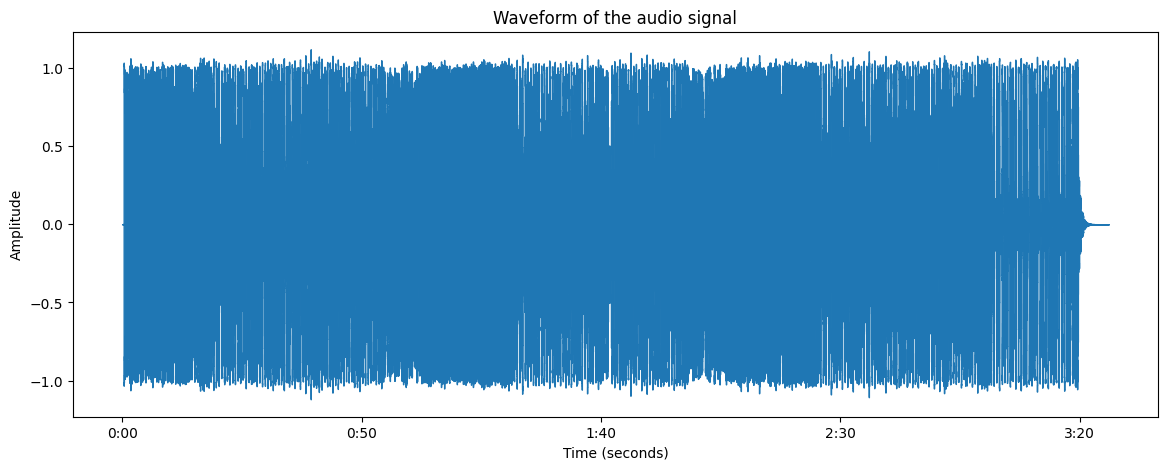

In [ ]:
# wav 파일 로드
#y, sr = librosa.load(file_upload)
y, sr = librosa.load(original)

# 시간 벡터 생성
time = librosa.times_like(y, sr=sr)

# 시각화
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the audio signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


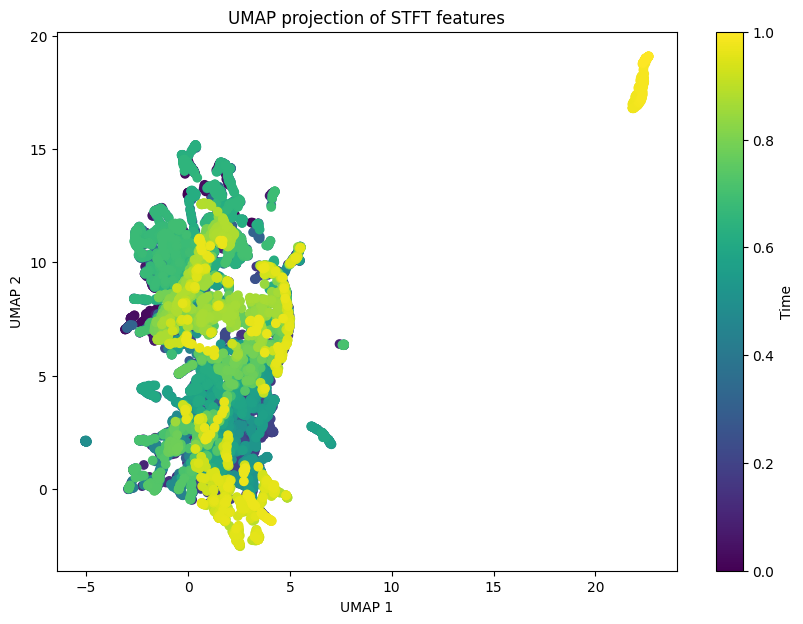

In [ ]:
# wav 파일 로드
y, sr = librosa.load(original)

# STFT 계산 (자체 설정)
#stft = librosa.stft(y, n_fft=2048, hop_length=512)
# STFT의 크기 변환 (magnitude)
#stft_mag = np.abs(stft)


# STFT 수행
D = librosa.stft(y)
D_magnitude = np.abs(D)

# STFT 결과를 로그 스케일로 변환
D_log = librosa.amplitude_to_db(D_magnitude, ref=np.max)

# UMAP을 사용하여 차원 축소
umap = UMAP(n_neighbors=15, n_components=2, metric='euclidean',random_state=42)
D_umap = umap.fit_transform(D_log.T)


# UMAP 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(D_umap[:, 0], D_umap[:, 1], c=np.linspace(0, 1, D_umap.shape[0]), cmap='viridis')
plt.title('UMAP projection of STFT features')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Time')
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


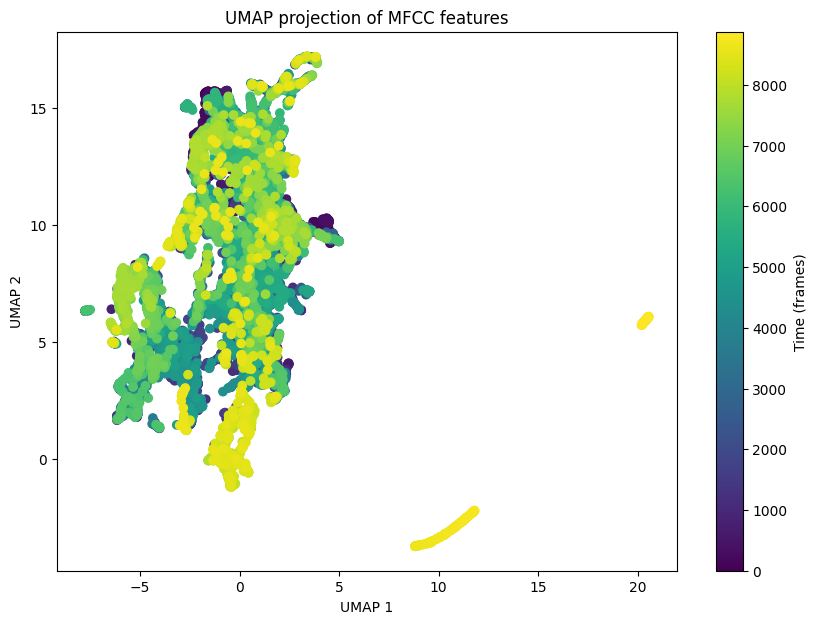

In [ ]:
# wav 파일 로드
y_mf, sr_mf = librosa.load(original)

# MFCC 추출 (자체 설정)
## mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=int(sr * 0.025), hop_length=int(sr * 0.010))

# MFCC 추출
mfccs = librosa.feature.mfcc(y=y_mf, sr=sr_mf, n_mfcc=13)
mfccs = mfccs.T  # 시간 축을 중심으로 데이터를 전치

# UMAP을 사용하여 차원 축소
umap = UMAP(n_neighbors=15, n_components=2, metric='euclidean',random_state=42)
mfccs_umap = umap.fit_transform(mfccs)

# UMAP 결과 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(mfccs_umap[:, 0], mfccs_umap[:, 1], c=np.arange(mfccs_umap.shape[0]), cmap='viridis')
plt.title('UMAP projection of MFCC features')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
cbar = plt.colorbar(sc)
cbar.set_label('Time (frames)')
plt.show()


In [ ]:
file_uploaded = '/content/drive/My Drive/Audio/Cupid-The-weeknd-Ai-generated-cover.wav'


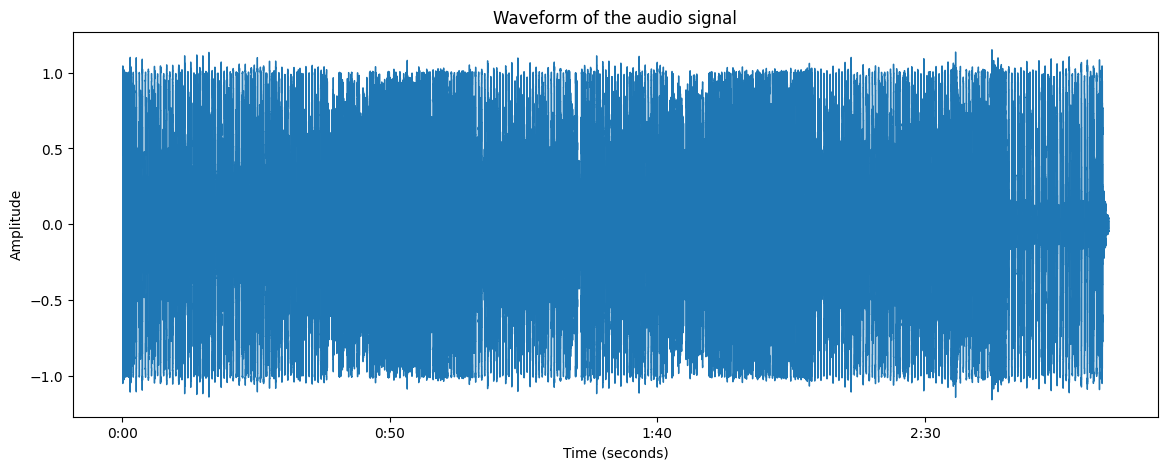

In [ ]:
# wav 파일 로드
#y, sr = librosa.load(file_uploaded)
y, sr = librosa.load(generate)

# 시간 벡터 생성
time = librosa.times_like(y, sr=sr)

# 시각화
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the audio signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


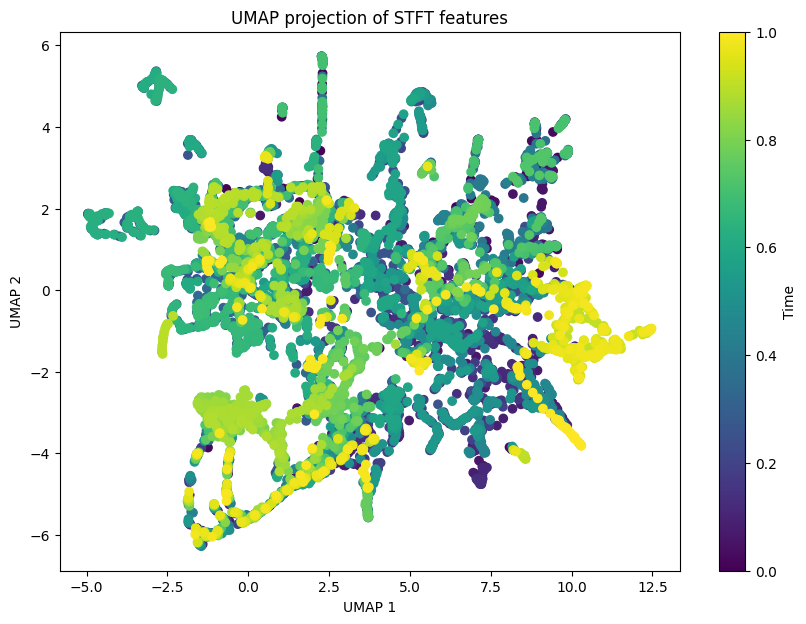

In [ ]:
# wav 파일 로드
y, sr = librosa.load(generate)

# STFT 수행
D = librosa.stft(y)
D_magnitude = np.abs(D)

# STFT 결과를 로그 스케일로 변환
D_log = librosa.amplitude_to_db(D_magnitude, ref=np.max)

# UMAP을 사용하여 차원 축소
umap = UMAP(n_neighbors=15, n_components=2, metric='euclidean',random_state=42)
D_umap = umap.fit_transform(D_log.T)

# UMAP 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(D_umap[:, 0], D_umap[:, 1], c=np.linspace(0, 1, D_umap.shape[0]), cmap='viridis')
plt.title('UMAP projection of STFT features')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Time')
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


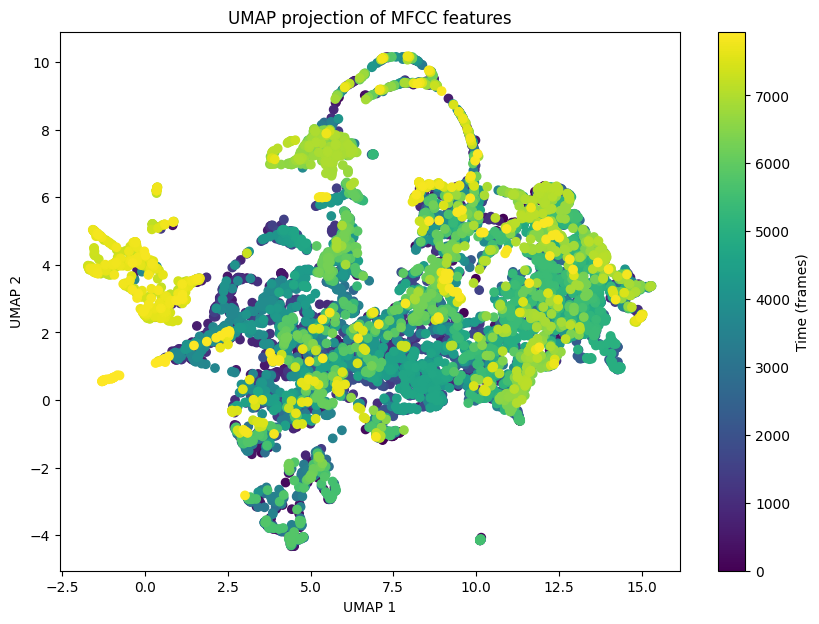

In [ ]:
# wav 파일 로드
y_mf, sr_mf = librosa.load(generate)

# MFCC 추출
mfccs = librosa.feature.mfcc(y=y_mf, sr=sr_mf, n_mfcc=13)
mfccs = mfccs.T  # 시간 축을 중심으로 데이터를 전치

# UMAP을 사용하여 차원 축소
umap = UMAP(n_neighbors=15, n_components=2, metric='euclidean',random_state=42)
mfccs_umap = umap.fit_transform(mfccs)

# UMAP 결과 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(mfccs_umap[:, 0], mfccs_umap[:, 1], c=np.arange(mfccs_umap.shape[0]), cmap='viridis')
plt.title('UMAP projection of MFCC features')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
cbar = plt.colorbar(sc)
cbar.set_label('Time (frames)')
plt.show()